In [16]:
# !dir /od "osaka"

 �h���C�u H �̃{�����[�� ���x���� superconducting.qubit@gmail.c... �ł�

�t�@�C����������܂���



 �{�����[�� �V���A���ԍ��� 1983-1116 �ł�

 h:\�}�C�h���C�u\RyoyaOhashi\JPA_tools\JPA_measurement �̃f�B���N�g��



In [3]:
import subprocess
import re
import numpy as np
import matplotlib.pylab as pl
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

In [71]:
# 1folder
folder = "pump_20221014_171009_40dB_-0.1--0.15V_8.5-11.0"
filename = "pump2020221014_171009_40dB_-0.1V.csv"
file_day = "pump2020221014_171009_40dB_"
csvname = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename

df = pd.read_csv(csvname, sep=',',header=None, usecols=[0,1,2,3,4,5])
all_freq = df.iloc[17:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

dB = float(df.iat[0, 5])
print(dB)
minV = float(df.iat[1,5])
maxV = float(df.iat[2,5])
numV = int(df.iat[3,5])

v0 = np.linspace(minV, maxV, numV)

if v0[1] > 0:
    v = v0
else:
    v = np.flip(v0)

print(minV, maxV, v)


17       8.500000000
18       8.501250000
19       8.502500000
20       8.503750000
21       8.505000000
            ...     
2013    10.995000000
2014    10.996250000
2015    10.997500000
2016    10.998750000
2017    11.000000000
Name: 1, Length: 2001, dtype: object 17    8.500000000
Name: 1, dtype: object 2017    11.000000000
Name: 1, dtype: object
40.0
-0.1 -0.15 [-0.15       -0.14791667 -0.14583333 -0.14375    -0.14166667 -0.13958333
 -0.1375     -0.13541667 -0.13333333 -0.13125    -0.12916667 -0.12708333
 -0.125      -0.12291667 -0.12083333 -0.11875    -0.11666667 -0.11458333
 -0.1125     -0.11041667 -0.10833333 -0.10625    -0.10416667 -0.10208333
 -0.1       ]


In [72]:
vault = np.array([])
v_2001 = np.zeros(len(all_freq))
for m,n in enumerate(v):
    # print(m,n)
    filename = file_day + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename
    dat = np.loadtxt(csvname1, skiprows=17, delimiter=',', unpack=True, usecols=[0,1,2,3])
    # phase[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)
    
    # print(dat[:,0])
    # dat[0,:] = v[m]
    
    for n in range(len(all_freq)):
        v_2001[n] = v[m]
        # print(n)
    # print(v_2001)
    
    dat[0,:] = v_2001
    r,c = dat.shape
    # print(dat[0,:])

    
    # print(dat.ravel())
    # vault = np.vstack((vault,dat)) if vault.size > 0 else dat.ravel()
    vault = np.vstack((vault,dat.ravel())) if vault.size > 0 else dat.ravel()
    
    # print(vault)
# vault=vault.reshape((r,c,vault.shape[0]))
vault=vault.reshape((vault.shape[0],r,c))
print(vault.shape[0],r,c)
# print(vault[:,:,1])
print(vault)
# np.savetxt("vault[0]", vault[0], delimiter=",")
# np.savetxt("dat", dat, delimiter=",")



# f0 = open('out.csv', 'w')
# data = vault[:,0,:],vault[:,1,:],vault[:,2,:],vault[:,3,:]
# # data = vault[:,:,0],vault[:,:,1],vault[:,:,2],vault[:,:,3]
# writer = csv.writer(f0)
# writer.writerow(data)
# f0.close()
# print(vault[:,:,0],vault[:,:,1])


25 4 2001
[[[-1.50000000e-01 -1.50000000e-01 -1.50000000e-01 ... -1.50000000e-01
   -1.50000000e-01 -1.50000000e-01]
  [ 8.50000000e+00  8.50125000e+00  8.50250000e+00 ...  1.09975000e+01
    1.09987500e+01  1.10000000e+01]
  [-5.89000000e+01 -5.89000000e+01 -5.90000000e+01 ... -6.24000000e+01
   -6.23000000e+01 -6.23000000e+01]
  [-2.24358500e+01 -2.21050500e+01 -2.16852000e+01 ...  4.89776600e+00
    5.51919300e+00  6.24269100e+00]]

 [[-1.47916667e-01 -1.47916667e-01 -1.47916667e-01 ... -1.47916667e-01
   -1.47916667e-01 -1.47916667e-01]
  [ 8.50000000e+00  8.50125000e+00  8.50250000e+00 ...  1.09975000e+01
    1.09987500e+01  1.10000000e+01]
  [-5.89413400e+01 -5.89057100e+01 -5.89572300e+01 ... -6.23663900e+01
   -6.23244500e+01 -6.22937500e+01]
  [-2.24292000e+01 -2.24130700e+01 -2.19564100e+01 ...  1.91154000e+00
    2.61579200e+00  2.85536300e+00]]

 [[-1.45833333e-01 -1.45833333e-01 -1.45833333e-01 ... -1.45833333e-01
   -1.45833333e-01 -1.45833333e-01]
  [ 8.50000000e+00  8.5

magnitude plot

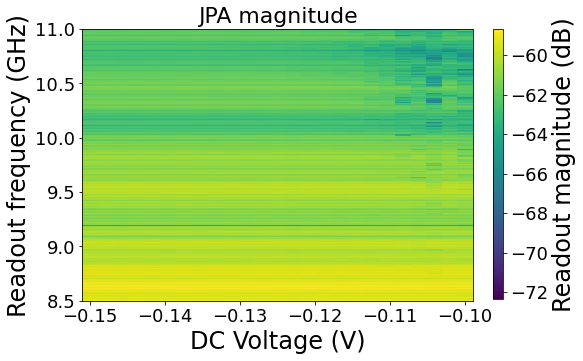

In [73]:
#　位相評価
import matplotlib.pyplot as pl
fig, ax = pl.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(vault[:,0,:],vault[:,1,:],vault[:,2,:])
# hoge00.set_clim(-60,-40)
cax = pl.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = pl.colorbar(hoge00, cax=cax)
# cbar = fig.colorbar(ticks=[-3.14,-2,-1 0, 1,2,3.14])

ax.set_title("JPA magnitude", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout magnitude (dB)", size=24) #カラーバーのラベル
ax.tick_params(labelsize=18)
pl.tick_params(labelsize=18)

pl.show()
del pl

d(theta)/d(current) obtained through the numerical derivation using gauss convolution

[-1.83058100e-12 -1.49876186e-10 -8.23428528e-09 -3.03045680e-07
 -7.45330634e-06 -1.22096760e-04 -1.32573946e-03 -9.46959681e-03
 -4.39369336e-02 -1.29316218e-01 -2.28916681e-01 -2.05644391e-01
  0.00000000e+00  2.05644391e-01  2.28916681e-01  1.29316218e-01
  4.39369336e-02  9.46959681e-03  1.32573946e-03  1.22096760e-04
  7.45330634e-06  3.03045680e-07  8.23428528e-09  1.49876186e-10
  1.83058100e-12] (25,) [6.10193668e-13 5.45004313e-11 3.29371411e-09 1.34686969e-07
 3.72665317e-06 6.97695772e-05 8.83826307e-04 7.57567744e-03
 4.39369336e-02 1.72421624e-01 4.57833362e-01 8.22577562e-01
 1.00000000e+00 8.22577562e-01 4.57833362e-01 1.72421624e-01
 4.39369336e-02 7.57567744e-03 8.83826307e-04 6.97695772e-05
 3.72665317e-06 1.34686969e-07 3.29371411e-09 5.45004313e-11
 6.10193668e-13] (25,)


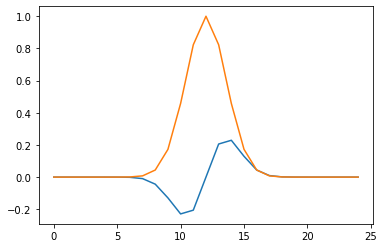

In [74]:
import matplotlib.pyplot as pl
sigma=0.4
x=np.arange(-12,12.1)/4;
g=x*np.exp(-x*x/2/sigma**2)
h=np.exp(-x*x/2/sigma**2)
print(g,g.shape,h,h.shape)
pl.plot(g)
pl.plot(h)

In [75]:
#　微分評価, vault[:,2,:]
rdiff=np.array([])
idiff=np.array([])
reg  =np.array([])
img  =np.array([])
# for i in range(r):
for i in range(c):
  _dat=np.convolve(g,vault[:,2,i],'same');  rdiff=np.vstack((rdiff,_dat)) if rdiff.size > 0 else _dat
  _dat=np.convolve(g,vault[:,3,i],'same');  idiff=np.vstack((idiff,_dat)) if idiff.size > 0 else _dat
  _dat=np.convolve(h,vault[:,2,i],'same');  reg=np.vstack((reg,_dat)) if reg.size > 0 else _dat
  _dat=np.convolve(h,vault[:,3,i],'same');  img=np.vstack((img,_dat)) if img.size > 0 else _dat

rdiff=rdiff.T
idiff=idiff.T
reg=reg.T
img=img.T

print(reg.shape,img.shape)
print(idiff.shape,rdiff.shape)
print(vault[:,2,:].shape)

f3 = open('rdiff,idiff.csv', 'w')
data = rdiff,idiff,reg,img
writer = csv.writer(f3)
writer.writerow(data)
f3.close()

(25, 2001) (25, 2001)
(25, 2001) (25, 2001)
(25, 2001)


In [76]:
diff = 2*(reg*rdiff + img*idiff)/2/10E3
print(diff)
# print(reg*rdiff)
# print(img*idiff)
f3 = open('diff.csv', 'w')
data = diff
writer = csv.writer(f3)
writer.writerow(data)
f3.close()

[[-0.61628913 -0.61429064 -0.6140118  ... -0.60321576 -0.6025122
  -0.60235614]
 [-0.54705533 -0.54531215 -0.54580378 ... -0.53400102 -0.5331865
  -0.53248375]
 [-0.27814065 -0.27804893 -0.27864252 ... -0.27123422 -0.27038947
  -0.26931802]
 ...
 [ 0.30182882  0.29986165  0.2968637  ...  2.37059143  2.33890142
   2.41156982]
 [ 0.59873767  0.59668541  0.59456413 ...  3.22945823  3.25268613
   3.34666564]
 [ 0.67875382  0.67595152  0.67592521 ...  2.18405153  2.21954895
   2.2610837 ]]


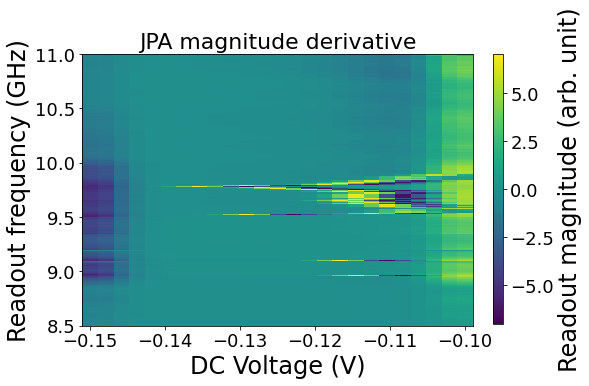

In [77]:
#　微分評価
import matplotlib.pyplot as pl



fig, ax = pl.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(vault[:,0,:],vault[:,1,:],diff)
# hoge00 = ax.pcolormesh(vault[:,0,:],vault[:,1,:],(diff),vmin=-.2,vmax=.2)
# hoge00.set_clim(-3,3)
cax = pl.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = pl.colorbar(hoge00, cax=cax)
# cbar = fig.colorbar(ticks=[-3.14,-2,-1 0, 1,2,3.14])

ax.set_title("JPA magnitude derivative", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout magnitude (arb. unit)", size=24) #カラーバーのラベル
pl.tick_params(labelsize=18)
ax.tick_params(labelsize=18)


pl.show()
del pl